# 01 - Business & Data Understanding

## CRISP-DM: Fases 1 e 2

Este notebook cobre as fases iniciais da **CRISP-DM**, com ênfase em Business Understanding (Fase 1) e Data Understanding (Fase 2) para o projeto D4Maia de previsão de consumo energético.

### Resumo Executivo

| Fase CRISP-DM | Conteúdo |
|---------------|----------|
| **Business Understanding** | Contexto do Município da Maia, necessidades dos decisores, objetivos de negócio convertidos em objetivos técnicos e métricas de sucesso |
| **Data Understanding** | EDA completo: estrutura, estatísticas, distribuições, correlações, padrões temporais |

### Dataset D4Maia
- **~6 milhões de registos** de consumo energético
- **Intervalo**: Leituras a cada 15 minutos (96/dia, 672/semana)
- **Variáveis principais**: CPE (identificador), tstamp (timestamp), PotActiva (kWh), DadosDeConsumo (kWh)
- **Variáveis auxiliares**: PotReactIndut, PotReactCapac (potências reativas)

### Objetivos do Projeto
1. **Clustering**: Identificar perfis de consumidores (K-Means, DBSCAN)
2. **Séries Temporais**: Prever consumo futuro (Baseline, ARIMA, LSTM)
3. **Features Agregadas**: Modelos supervisionados (RF, XGBoost, MLP)
4. **Normalização**: Avaliar impacto em todos os modelos

### Fase 1 — Business Understanding (refinada)
- **Problema de negócio**: Melhorar eficiência energética e priorizar intervenções em edifícios municipais.
- **Perguntas-chave**:
  - Que perfis de consumo existem e quais são os mais dispendiosos?
  - Onde estão os outliers que podem indicar desperdício ou anomalias?
  - Podemos prever consumo com antecedência suficiente para ações proativas?
- **Objetivos técnicos alinhados**:
  - Segmentar CPEs para apoiar decisões (planeamento e operações).
  - Detectar outliers para inspeção/otimização.
  - Fornecer previsões semanais para gestão de capacidade.
- **Métricas de sucesso** (ligadas ao negócio):
  - Perfis interpretáveis e acionáveis (clusters claramente descritos).
  - Redução de falsos positivos em outliers.
  - Melhoria da previsão vs baseline simples (semana anterior).

---

**Autor:** D4Maia Project Team  
**UC:** Introdução à Aprendizagem Automática - MEI 2025/2026  
**Metodologia:** CRISP-DM (exceto Deployment)

## 1. Business Understanding

### 1.1 Contexto do Problema

O **Município da Maia** enfrenta o desafio de otimizar a gestão energética dos seus edifícios de serviços municipais num contexto de crescente preocupação com a eficiência energética e sustentabilidade ambiental. A análise de dados de consumo de energia elétrica torna-se fundamental para identificar oportunidades de redução de custos, detetar anomalias e planear intervenções de melhoria.

O dataset **D4Maia** contém aproximadamente **6 milhões de registos** de leituras realizadas a cada **15 minutos**, proporcionando uma visão detalhada e de alta resolução temporal do comportamento energético das instalações municipais.

**Estrutura dos Dados:**
- `CPE` - Código do Ponto de Entrega (identificador único da instalação)
- `tstamp` - Timestamp da leitura (data e hora com precisão de 15 minutos)
- `DadosDeConsumo` - Energia consumida para faturação (kWh)
- `PotActiva` - Potência ativa registada (kWh)
- `PotReactIndut` - Potência reativa indutiva (VAR)
- `PotReactCapac` - Potência reativa capacitiva (VAR)

Este notebook implementa as **fases 1 e 2 da metodologia CRISP-DM**, estabelecendo os fundamentos para um projeto de Machine Learning estruturado e orientado aos objetivos de negócio.

---

### 1.2 Objetivos de Negócio

O projeto visa responder a necessidades estratégicas e operacionais do Município:

#### 1.2.1 Compreensão dos Perfis de Consumo
- **Objetivo:** Identificar e caracterizar diferentes perfis de consumo energético entre as instalações municipais
- **Valor:** Permitir decisões informadas sobre gestão de recursos, planeamento de manutenção e priorização de investimentos em eficiência energética
- **Aplicação:** Segmentar instalações por padrões de uso (horário de funcionamento, sazonalidade, intensidade)

#### 1.2.2 Deteção de Anomalias e Desperdícios
- **Objetivo:** Identificar instalações com comportamentos atípicos ou consumos excessivos
- **Valor:** Facilitar a deteção precoce de problemas técnicos, desperdícios ou oportunidades de otimização
- **Aplicação:** Alertas automáticos para consumos anómalos que requerem investigação

#### 1.2.3 Capacidade Preditiva
- **Objetivo:** Avaliar a viabilidade de prever o consumo energético com antecedência
- **Valor:** Apoiar o planeamento operacional, orçamental e a gestão proativa de capacidade
- **Aplicação:** Previsões semanais para antecipação de necessidades e custos

---

### 1.3 Objetivos de Data Science

Traduzindo os objetivos de negócio em tarefas técnicas mensuráveis:

#### 1.3.1 Clustering (Aprendizagem Não Supervisionada)
**Algoritmos:** K-Means e DBSCAN

**Objetivos Específicos:**
- Segmentar CPEs em grupos homogéneos de consumo
- Identificar outliers e instalações com padrões únicos
- Caracterizar cada cluster através de métricas interpretáveis (consumo médio, variabilidade, horários pico)
- Validar clusters através de métricas como Silhouette Score e Davies-Bouldin Index

**Entregáveis:**
- Perfis de consumo claramente definidos e interpretáveis
- Classificação de cada CPE num perfil específico
- Identificação de instalações prioritárias para intervenção

---

#### 1.3.2 Previsão de Séries Temporais - Experiência 2(a)
**Algoritmos:** ARIMA e LSTM (Long Short-Term Memory)

**Objetivos Específicos:**
- Prever consumo energético com **1 semana de antecedência**
- Modelar a estrutura temporal dos dados (tendências, sazonalidade, autocorrelação)
- Comparar performance com baseline simples "repetição da semana anterior"

**Métricas de Avaliação:**
- MAE (Mean Absolute Error)
- RMSE (Root Mean Squared Error)
- MAPE (Mean Absolute Percentage Error)
- Comparação relativa face ao baseline

---

#### 1.3.3 Previsão com Features Agregadas - Experiência 2(b)
**Algoritmos:** Random Forest, XGBoost e MLP (Multilayer Perceptron)

**Objetivos Específicos:**
- Utilizar features agregadas (estatísticas históricas, padrões temporais) para previsão
- **Restrição temporal crítica:** Features calculadas apenas com dados de pelo menos 1 semana antes do período a prever
- Avaliar capacidade preditiva de modelos supervisionados vs abordagens temporais puras
- Comparar diferentes famílias de algoritmos (ensemble trees vs redes neuronais)

**Features Candidatas:**
- Consumo médio, mediana, desvio padrão das últimas N semanas
- Máximos e mínimos históricos
- Padrões por hora do dia, dia da semana
- Tendências de crescimento/decrescimento
- Indicadores de variabilidade

---

#### 1.3.4 Análise do Impacto da Normalização
**Objetivo:** Quantificar o efeito da normalização de variáveis no desempenho dos modelos

**Abordagem:**
- Executar todos os modelos com e sem normalização (StandardScaler, MinMaxScaler)
- Comparar métricas de performance
- Avaliar sensibilidade de cada algoritmo à escala dos dados

**Relevância:**
- K-Means e redes neuronais são sensíveis à escala
- Árvores de decisão são invariantes à escala
- Resultados informam boas práticas de pré-processamento

---

### 1.4 Critérios de Sucesso

O projeto será considerado bem-sucedido se alcançar:

#### 1.4.1 Critérios Técnicos
- **Clustering:** Silhouette Score > 0.3 e clusters com interpretação clara de negócio
- **Previsão:** Superar baseline "semana anterior" em pelo menos 10% nas métricas MAE/RMSE
- **Generalização:** Performance consistente em validação cruzada temporal
- **Normalização:** Documentação clara do impacto em cada família de algoritmos

#### 1.4.2 Critérios de Negócio
- **Acionabilidade:** Perfis de consumo devem permitir decisões operacionais concretas
- **Precisão Prática:** Previsões com margem de erro aceitável para planeamento (MAPE < 20%)
- **Deteção de Outliers:** Redução de falsos positivos mantendo alta sensibilidade
- **Interpretabilidade:** Resultados compreensíveis para decisores não técnicos

#### 1.4.3 Critérios de Implementação
- Código reproduzível e bem documentado
- Metodologia CRISP-DM seguida rigorosamente
- Validação temporal adequada (sem data leakage)
- Análise crítica de limitações e próximos passos

---

### 1.5 Plano de Análise

O projeto segue a metodologia **CRISP-DM** (exceto fase de Deployment) estruturada em notebooks sequenciais:

| Notebook | Fase CRISP-DM | Conteúdo Principal |
|----------|---------------|-------------------|
| **01_business_data_understanding** | Business & Data Understanding | Contexto, objetivos, EDA completo, análise temporal |
| **02_data_preparation** | Data Preparation | Limpeza, feature engineering, criação de datasets |
| **03_clustering** | Modeling | K-Means, DBSCAN, análise de perfis |
| **04_time_series** | Modeling | ARIMA, LSTM, previsão direta de séries |
| **05_supervised** | Modeling | Random Forest, XGBoost, MLP com features |
| **06_evaluation** | Evaluation | Comparação de modelos, análise de normalização |

**Este notebook (01)** estabelece a fundação do projeto através de:
- Alinhamento entre objetivos de negócio e técnicos
- Exploração abrangente dos dados (Data Understanding)
- Identificação de padrões, qualidade e características dos dados
- Definição de estratégias de pré-processamento e modelação

---

### 1.6 Questões de Investigação

O projeto procura responder:

1. **Quantos perfis distintos de consumo existem?** Que características definem cada perfil?
2. **Quais instalações apresentam consumos anómalos?** São outliers genuínos ou problemas de medição?
3. **Existe sazonalidade e ciclicidade previsível?** Padrões diários, semanais, mensais?
4. **É possível prever consumo com 1 semana de antecedência de forma útil?** Qual a margem de erro expectável?
5. **Que abordagem é mais eficaz: séries temporais puras ou features agregadas?**
6. **A normalização é crítica ou dispensável para cada família de algoritmos?**

As respostas orientarão decisões de gestão energética e intervenções futuras no Município da Maia.

---

## 2. Data Understanding

Esta seção realiza uma exploração abrangente do dataset D4Maia, seguindo as melhores práticas de análise de dados. O objetivo é obter insights sobre a qualidade dos dados, distribuições, padrões temporais e características dos consumidores, preparando o terreno para as fases de Data Preparation e Modelação.

### Principais Análises Realizadas:
- **Carregamento e Inspeção Inicial:** Verificação da estrutura do dataset e tipos de dados
- **Estatísticas Descritivas:** Análise de distribuições, valores em falta e outliers
- **Análise de CPEs:** Caracterização dos pontos de entrega e sua distribuição temporal
- **Distribuições e Correlações:** Exploração das variáveis numéricas e suas relações
- **Análise Temporal:** Padrões de consumo ao longo do tempo (hora, dia, mês)
- **Séries Temporais:** Visualização de exemplos de séries temporais por CPE
- **Comparação de Perfis:** Diferenças entre consumidores

Os resultados desta análise guiarão as decisões de pré-processamento e feature engineering no próximo notebook.

In [1]:
# MELHORAMENTO: Adicionar constantes configuráveis no início
# =================================================================================
# CONFIGURAÇÕES GERAIS
# =================================================================================
SAMPLE_SIZE = 100000  # Tamanho de sample para visualizações pesadas
RANDOM_STATE = 42     # Seed para reprodutibilidade
VERBOSE = True         # Controle de outputs verbosos

# =================================================================================
# CONFIGURAÇÕES DE VISUALIZAÇÃO
# =================================================================================
MAX_CPES_PLOT = 10    # Máximo de CPEs em gráficos
FIG_SIZE_DEFAULT = (10, 6)  # Tamanho padrão de figuras
BINS_DEFAULT = 30    # Número padrão de bins em histogramas
ALPHA_DEFAULT = 0.7   # Transparência padrão para plots
LINE_WIDTH_DEFAULT = 2.0  # Largura de linha padrão
MARKER_SIZE_DEFAULT = 6.0  # Tamanho de marcador padrão

# =================================================================================
# CONFIGURAÇÕES GERAIS
# =================================================================================
SAMPLE_SIZE = 100000  # Tamanho de sample para visualizações pesadas
RANDOM_STATE = 42     # Seed para reprodutibilidade
VERBOSE = True         # Controle de outputs verbosos

# =================================================================================
# CONFIGURAÇÕES DE VISUALIZAÇÃO
# =================================================================================
MAX_CPES_PLOT = 10    # Máximo de CPEs em gráficos
FIG_SIZE_DEFAULT = (10, 6)  # Tamanho padrão de figuras
BINS_DEFAULT = 30    # Número padrão de bins em histogramas
ALPHA_DEFAULT = 0.7   # Transparência padrão para plots
LINE_WIDTH_DEFAULT = 2.0  # Largura de linha padrão
MARKER_SIZE_DEFAULT = 6.0  # Tamanho de marcador padrão

# =================================================================================
# CONFIGURAÇÕES DE ANÁLISE DE DADOS
# =================================================================================
IQR_MULTIPLIER = 1.5  # Multiplicador para detecção de outliers via IQR
CORR_DECIMALS = 4     # Casas decimais para correlação
STATS_DECIMALS = 4    # Casas decimais para estatísticas
PERCENTILES_TO_SHOW = [0.1, 0.25, 0.5, 0.75, 0.9]  # Percentis para análise

# =================================================================================
# CONFIGURAÇÕES TEMPORAIS
# =================================================================================
MIN_SEMANAS_ANALISE = 1  # Mínimo de semanas para análise temporal
MAX_DIAS_AUTOCORR = 7    # Máximo de dias para análise de autocorrelação
POINTS_AUTOCORR = 1000   # Número de pontos para autocorrelação

# =================================================================================
# CONFIGURAÇÕES DE PERFORMANCE
# =================================================================================
CHUNK_SIZE = 100000   # Tamanho de chunks para processamento em lote
MEMORY_LIMIT_MB = 1000 # Limite de memória para operações pesadas
TIMEOUT_SECONDS = 300  # Timeout para operações que podem demorar

# =================================================================================
# PALETA DE CORES CONSISTENTE
# =================================================================================
COLOR_PALETTE = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
                 '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Alias para compatibilidade
COLORS = COLOR_PALETTE

# =================================================================================
# CONFIGURAÇÕES DINÂMICAS (baseadas no dataset)
# =================================================================================
# Estas configurações se adaptam automaticamente ao tamanho e características do dataset

def configurar_parametros_dinamicos(df):
    """
    Configura parâmetros dinâmicos baseados nas características do dataset.
    """
    n_records = len(df)
    n_cpes = df['CPE'].nunique() if 'CPE' in df.columns else 0
    
    # Ajustar sample size baseado no tamanho do dataset
    dynamic_sample_size = min(SAMPLE_SIZE, max(10000, n_records // 10))
    
    # Ajustar bins baseado no número de CPEs
    dynamic_bins = min(BINS_DEFAULT, max(10, n_cpes // 10))
    
    # Ajustar chunk size baseado na memória disponível
    dynamic_chunk_size = min(CHUNK_SIZE, max(10000, n_records // 20))
    
    # Ajustar número máximo de CPEs para plot baseado no total
    dynamic_max_cpes = min(MAX_CPES_PLOT, max(5, n_cpes // 10))
    
    return {
        'sample_size': dynamic_sample_size,
        'bins': dynamic_bins,
        'chunk_size': dynamic_chunk_size,
        'max_cpes_plot': dynamic_max_cpes,
        'n_cpes': n_cpes,
        'n_records': n_records
    }

# Placeholder - será configurado após carregar dados
CONFIG_DINAMICA = {}

print("Sistema de constantes configuráveis inicializado!")
print("Parâmetros dinâmicos serão ajustados após carregamento dos dados.")

# Bibliotecas essenciais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
import os

# Configurações
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-whitegrid')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.4f}'.format)

# Cores para visualizações
COLORS = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

print("Bibliotecas importadas com sucesso!")

Sistema de constantes configuráveis inicializado!
Parâmetros dinâmicos serão ajustados após carregamento dos dados.
Bibliotecas importadas com sucesso!


### 2.1 Importação de Bibliotecas

In [2]:
# Instalar tabulate para tabelas mais legíveis (opcional)
%pip install tabulate --quiet

# Importar tabulate
from tabulate import tabulate

# MELHORAMENTO: Função auxiliar para sampling seguro
# Nota: Usa SAMPLE_SIZE como default, será substituído por SAMPLE_SIZE_ATUAL após carregar dados
def safe_sample(df, n=None):
    """Retorna sample do DataFrame se for grande, senão o original."""
    if n is None:
        n = SAMPLE_SIZE  # Usa constante global
    return df.sample(n=min(n, len(df)), random_state=RANDOM_STATE) if len(df) > n else df

# MELHORAMENTO: Função auxiliar para plotar histogramas com KDE
def plot_histogram_kde(data, title, ax, color, bins=None, sample_size=None):
    """Plota histograma com KDE e estatísticas."""
    if bins is None:
        bins = BINS_DEFAULT  # Usa constante global
    if sample_size is None:
        sample_size = SAMPLE_SIZE  # Usa constante global
        
    if len(data) == 0:
        ax.text(0.5, 0.5, 'Sem dados válidos', ha='center', va='center', transform=ax.transAxes)
        return
    
    data_sample = data.sample(min(len(data), sample_size), random_state=RANDOM_STATE) if len(data) > sample_size else data
    sns.histplot(data_sample, bins=bins, kde=True, ax=ax, color=color, alpha=ALPHA_DEFAULT)
    
    # Estatísticas no gráfico
    stats = f'n={len(data):,}\nMean={data.mean():.2f}\nMed={data.median():.2f}\nStd={data.std():.2f}'
    ax.text(0.95, 0.95, stats, transform=ax.transAxes, fontsize=9, va='top', ha='right',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    ax.set_title(title, fontsize=12, fontweight='bold')

print("Funções auxiliares definidas com sucesso!")

Note: you may need to restart the kernel to use updated packages.
Funções auxiliares definidas com sucesso!



[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


### 2.2 Carregamento dos Dados

In [3]:
# MELHORAMENTO: Verificação de arquivo antes de carregar
DATA_PATH = 'consumo15m_11_2025.csv'

if not os.path.exists(DATA_PATH):
    raise FileNotFoundError(f"Arquivo não encontrado: {DATA_PATH}")

# Carregar os dados
print("A carregar os dados...")
try:
    df = pd.read_csv(DATA_PATH, na_values=['NULL', 'null', ''])
    print(f"Dados carregados: {len(df):,} linhas × {df.shape[1]} colunas")
except Exception as e:
    print(f"Erro ao carregar dados: {e}")
    raise

# =================================================================================
# CONFIGURAR PARÂMETROS DINÂMICOS APÓS CARREGAMENTO
# =================================================================================
CONFIG_DINAMICA = configurar_parametros_dinamicos(df)

print(f"\n📊 CONFIGURAÇÕES DINÂMICAS AJUSTADAS:")
print(f"  - Sample size dinâmico: {CONFIG_DINAMICA['sample_size']:,} (vs {SAMPLE_SIZE:,} padrão)")
print(f"  - Bins dinâmicos: {CONFIG_DINAMICA['bins']} (vs {BINS_DEFAULT} padrão)")
print(f"  - Chunk size dinâmico: {CONFIG_DINAMICA['chunk_size']:,} (vs {CHUNK_SIZE:,} padrão)")
print(f"  - Max CPEs para plot: {CONFIG_DINAMICA['max_cpes_plot']} (vs {MAX_CPES_PLOT} padrão)")

# Usar configurações dinâmicas quando apropriado
SAMPLE_SIZE_ATUAL = CONFIG_DINAMICA['sample_size']
BINS_ATUAL = CONFIG_DINAMICA['bins']
MAX_CPES_PLOT_ATUAL = CONFIG_DINAMICA['max_cpes_plot']

A carregar os dados...
Dados carregados: 5,940,182 linhas × 6 colunas

📊 CONFIGURAÇÕES DINÂMICAS AJUSTADAS:
  - Sample size dinâmico: 100,000 (vs 100,000 padrão)
  - Bins dinâmicos: 10 (vs 30 padrão)
  - Chunk size dinâmico: 100,000 (vs 100,000 padrão)
  - Max CPEs para plot: 9 (vs 10 padrão)


### 2.3 Inspeção Inicial dos Dados

In [4]:
# Visualizar as primeiras linhas
print("=" * 80)
print("PRIMEIRAS LINHAS DO DATASET")
print("=" * 80)
df.head(10)

PRIMEIRAS LINHAS DO DATASET


,CPE,tstamp,DadosdeConsumo,PotActiva,PotReactIndut,PotReactCapac
0,PT0002000089069203YG,2022-12-31 00:15:00,NaN,0.2960,NaN,NaN
1,PT0002000089069203YG,2022-12-31 00:30:00,NaN,0.2920,NaN,NaN
2,PT0002000089069203YG,2022-12-31 00:45:00,NaN,0.2840,NaN,NaN
3,PT0002000089069203YG,2022-12-31 01:00:00,NaN,0.2800,NaN,NaN
4,PT0002000089069203YG,2022-12-31 01:15:00,NaN,0.2720,NaN,NaN
5,PT0002000089069203YG,2022-12-31 01:30:00,NaN,0.2680,NaN,NaN
6,PT0002000089069203YG,2022-12-31 01:45:00,NaN,0.3720,NaN,NaN
7,PT0002000089069203YG,2022-12-31 02:00:00,NaN,0.3680,NaN,NaN
8,PT0002000089069203YG,2022-12-31 02:15:00,NaN,0.3880,NaN,NaN
9,PT0002000089069203YG,2022-12-31 02:30:00,NaN,0.3440,NaN,NaN


In [5]:
# Informações sobre o dataset
print("=" * 80)
print("INFORMAÇÕES DO DATASET")
print("=" * 80)
df.info()

INFORMAÇÕES DO DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5940182 entries, 0 to 5940181
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   CPE             object 
 1   tstamp          object 
 2   DadosdeConsumo  float64
 3   PotActiva       float64
 4   PotReactIndut   float64
 5   PotReactCapac   float64
dtypes: float64(4), object(2)
memory usage: 271.9+ MB


In [6]:
# Verificar os nomes das colunas
print("\nColunas do dataset:")
for i, col in enumerate(df.columns, 1):
    print(f"  {i}. {col}")


Colunas do dataset:
  1. CPE
  2. tstamp
  3. DadosdeConsumo
  4. PotActiva
  5. PotReactIndut
  6. PotReactCapac


In [7]:
# Conversão da coluna de timestamp para datetime
df['tstamp'] = pd.to_datetime(df['tstamp'])

# Ordenar por CPE e timestamp
df = df.sort_values(['CPE', 'tstamp']).reset_index(drop=True)

print("Coluna 'tstamp' convertida para datetime e dados ordenados por CPE e timestamp.")
print(f"\nPeríodo dos dados:")
print(f"  Início: {df['tstamp'].min()}")
print(f"  Fim:    {df['tstamp'].max()}")
print(f"  Duração: {(df['tstamp'].max() - df['tstamp'].min()).days} dias")

Coluna 'tstamp' convertida para datetime e dados ordenados por CPE e timestamp.

Período dos dados:
  Início: 2022-12-31 00:15:00
  Fim:    2025-05-01 00:00:00
  Duração: 851 dias


### 2.4 Estatísticas Descritivas

In [8]:
# Estatísticas descritivas das variáveis numéricas
print("=" * 80)
print("ESTATÍSTICAS DESCRITIVAS")
print("=" * 80)
df.describe()

ESTATÍSTICAS DESCRITIVAS


,tstamp,DadosdeConsumo,PotActiva,PotReactIndut,PotReactCapac
count,5940182,0.0000,5940182.0000,3668710.0000,3668710.0000
mean,2024-04-15 22:32:26.636112896,NaN,8.0940,1.7153,0.6526
min,2022-12-31 00:15:00,NaN,0.0000,0.0000,0.0000
25%,2023-09-28 05:00:00,NaN,0.1200,0.0000,0.0000
50%,2024-05-15 14:00:00,NaN,2.0000,0.0000,0.0000
75%,2024-11-08 01:00:00,NaN,7.0000,2.0000,1.0000
max,2025-05-01 00:00:00,NaN,574.0000,177.0000,124.0000
std,NaN,NaN,23.0183,3.3856,1.6624


In [9]:
# Análise de valores em falta (missing values)
print("=" * 80)
print("ANÁLISE DE VALORES EM FALTA")
print("=" * 80)

missing_count = df.isnull().sum()
missing_pct = (df.isnull().sum() / len(df) * 100).round(2)

missing_df = pd.DataFrame({
    'Coluna': df.columns,
    'Valores em Falta': missing_count.values,
    'Percentagem (%)': missing_pct.values
})

# MELHORAMENTO: Usar tabulate para tabelas mais legíveis
from tabulate import tabulate
print(tabulate(missing_df, headers='keys', tablefmt='grid', floatfmt='.2f'))

ANÁLISE DE VALORES EM FALTA
+----+----------------+--------------------+-------------------+
|    | Coluna         |   Valores em Falta |   Percentagem (%) |
+====+================+====================+===================+
|  0 | CPE            |                  0 |              0.00 |
+----+----------------+--------------------+-------------------+
|  1 | tstamp         |                  0 |              0.00 |
+----+----------------+--------------------+-------------------+
|  2 | DadosdeConsumo |            5940182 |            100.00 |
+----+----------------+--------------------+-------------------+
|  3 | PotActiva      |                  0 |              0.00 |
+----+----------------+--------------------+-------------------+
|  4 | PotReactIndut  |            2271472 |             38.24 |
+----+----------------+--------------------+-------------------+
|  5 | PotReactCapac  |            2271472 |             38.24 |
+----+----------------+--------------------+------------------

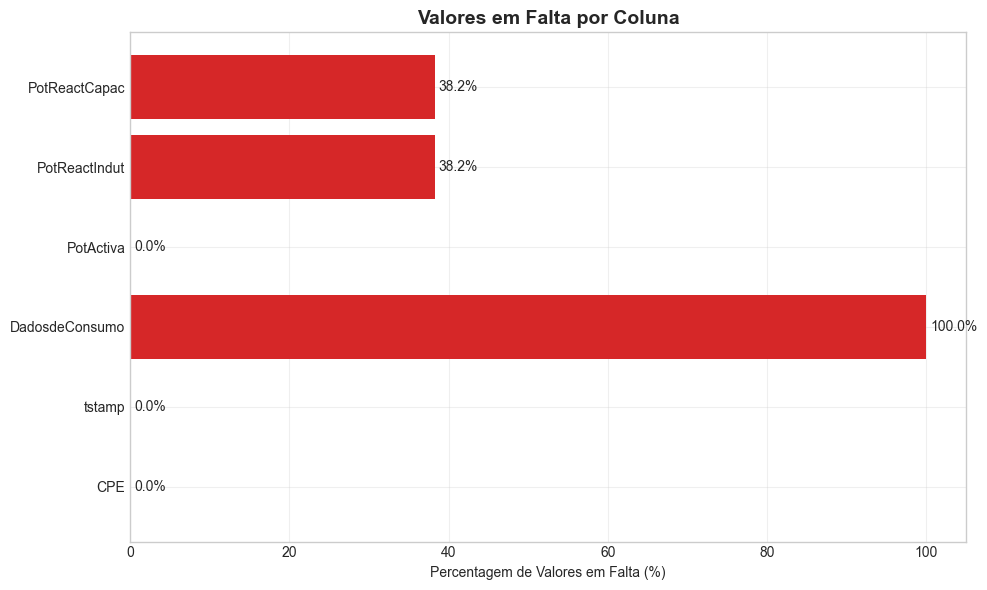

In [10]:
# Visualização dos valores em falta
fig, ax = plt.subplots(figsize=FIG_SIZE_DEFAULT)

colors = ['#2ca02c' if pct == 0 else '#d62728' for pct in missing_pct.values]
bars = ax.barh(missing_df['Coluna'], missing_df['Percentagem (%)'], color=colors)

ax.set_xlabel('Percentagem de Valores em Falta (%)')
ax.set_title('Valores em Falta por Coluna', fontsize=14, fontweight='bold')

# Adicionar valores nas barras
for bar, pct in zip(bars, missing_pct.values):
    width = bar.get_width()
    ax.text(width + 0.5, bar.get_y() + bar.get_height()/2, 
            f'{pct:.1f}%', ha='left', va='center')

ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 2.5 Análise dos CPEs (Pontos de Entrega)

In [11]:
# Número de CPEs distintos
n_cpes = df['CPE'].nunique()
print(f"Número de CPEs (instalações) distintos: {n_cpes}")

# Distribuição de registos por CPE
cpe_counts = df.groupby('CPE').size().reset_index(name='n_registos')
cpe_counts = cpe_counts.sort_values('n_registos', ascending=False)

print(f"\nEstatísticas de registos por CPE:")
print(f"  Mínimo:  {cpe_counts['n_registos'].min():,} registos")
print(f"  Máximo:  {cpe_counts['n_registos'].max():,} registos")
print(f"  Média:   {cpe_counts['n_registos'].mean():,.0f} registos")
print(f"  Mediana: {cpe_counts['n_registos'].median():,.0f} registos")

Número de CPEs (instalações) distintos: 91

Estatísticas de registos por CPE:
  Mínimo:  14,490 registos
  Máximo:  81,776 registos
  Média:   65,277 registos
  Mediana: 78,699 registos


In [12]:
# Lista dos CPEs (top 10 com mais registos)
max_cpes_show = min(MAX_CPES_PLOT, len(cpe_counts))
cpe_counts_top = cpe_counts.head(max_cpes_show)
print(f"Top {max_cpes_show} CPEs por número de registos:")
print("=" * 80)
for i, (_, row) in enumerate(cpe_counts_top.iterrows(), 1):
    print(f"{i:2d}. {row['CPE']} - {row['n_registos']:,} registos")

Top 10 CPEs por número de registos:
 1. PT0002000068856906VS - 81,776 registos
 2. PT0002000068856781NM - 81,776 registos
 3. PT0002000081997398TD - 81,774 registos
 4. PT0002000073231742VK - 81,773 registos
 5. PT0002000078233981HJ - 81,772 registos
 6. PT0002000068859393XH - 81,772 registos
 7. PT0002000100113293JT - 81,772 registos
 8. PT0002000115031201VQ - 81,772 registos
 9. PT0002000033074862LZ - 81,772 registos
10. PT0002000068859187RL - 81,771 registos


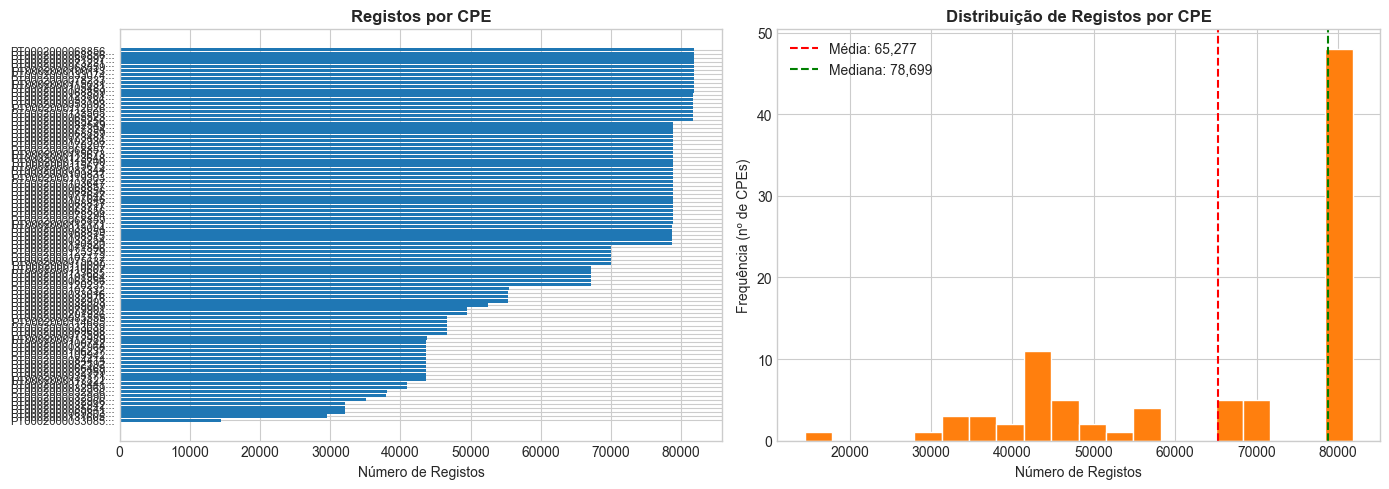

In [13]:
# Visualização da distribuição de registos por CPE
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de barras
ax1 = axes[0]
cpe_counts_sorted = cpe_counts.sort_values('n_registos', ascending=True)
ax1.barh(range(len(cpe_counts_sorted)), cpe_counts_sorted['n_registos'], color=COLORS[0])
ax1.set_yticks(range(len(cpe_counts_sorted)))
ax1.set_yticklabels([cpe[:15] + '...' if len(cpe) > 15 else cpe for cpe in cpe_counts_sorted['CPE']], fontsize=8)
ax1.set_xlabel('Número de Registos')
ax1.set_title('Registos por CPE', fontsize=12, fontweight='bold')

# Histograma
ax2 = axes[1]
ax2.hist(cpe_counts['n_registos'], bins=20, color=COLORS[1], edgecolor='white')
ax2.set_xlabel('Número de Registos')
ax2.set_ylabel('Frequência (nº de CPEs)')
ax2.set_title('Distribuição de Registos por CPE', fontsize=12, fontweight='bold')
ax2.axvline(cpe_counts['n_registos'].mean(), color='red', linestyle='--', label=f'Média: {cpe_counts["n_registos"].mean():,.0f}')
ax2.axvline(cpe_counts['n_registos'].median(), color='green', linestyle='--', label=f'Mediana: {cpe_counts["n_registos"].median():,.0f}')
ax2.legend()

plt.tight_layout()
plt.show()

In [14]:
# Calcular período de dados por CPE
cpe_periodo = df.groupby('CPE').agg(
    inicio=('tstamp', 'min'),
    fim=('tstamp', 'max'),
    n_registos=('tstamp', 'count')
).reset_index()

cpe_periodo['dias'] = (cpe_periodo['fim'] - cpe_periodo['inicio']).dt.days
cpe_periodo['semanas'] = cpe_periodo['dias'] / 7

print("Período de dados por CPE:")
print("=" * 100)
cpe_periodo

Período de dados por CPE:


,CPE,inicio,fim,n_registos,dias,semanas
0,PT0002000032936306KX,2024-03-01 00:15:00,2025-05-01,38008,425,60.7143
1,PT0002000032942455NH,2024-06-01 00:15:00,2025-05-01,32058,333,47.5714
2,PT0002000032959511HP,2024-02-01 00:15:00,2025-05-01,43666,454,64.8571
3,PT0002000032966446CC,2024-05-01 00:15:00,2025-05-01,35081,364,52.0000
4,PT0002000032968749YT,2024-02-01 00:00:00,2025-05-01,43668,455,65.0000
...,...,...,...,...,...,...
86,PT0002000125379984SH,2022-12-31 00:15:00,2025-05-01,69969,851,121.5714
87,PT0002000131605602FL,2024-03-01 00:15:00,2025-02-01,29517,336,48.0000
88,PT0002000133505542CK,2023-01-01 00:15:00,2025-05-01,81675,850,121.4286
89,PT0002000133685986TF,2023-05-01 00:15:00,2025-05-01,67187,730,104.2857


### 2.6 Distribuição das Variáveis Numéricas

In [15]:
# Selecionar variáveis numéricas para análise
numeric_cols = ['DadosdeConsumo', 'PotActiva', 'PotReactIndut', 'PotReactCapac']

# Verificar quais colunas existem no dataset
available_cols = [col for col in numeric_cols if col in df.columns]
print(f"Colunas numéricas disponíveis: {available_cols}")

Colunas numéricas disponíveis: ['DadosdeConsumo', 'PotActiva', 'PotReactIndut', 'PotReactCapac']


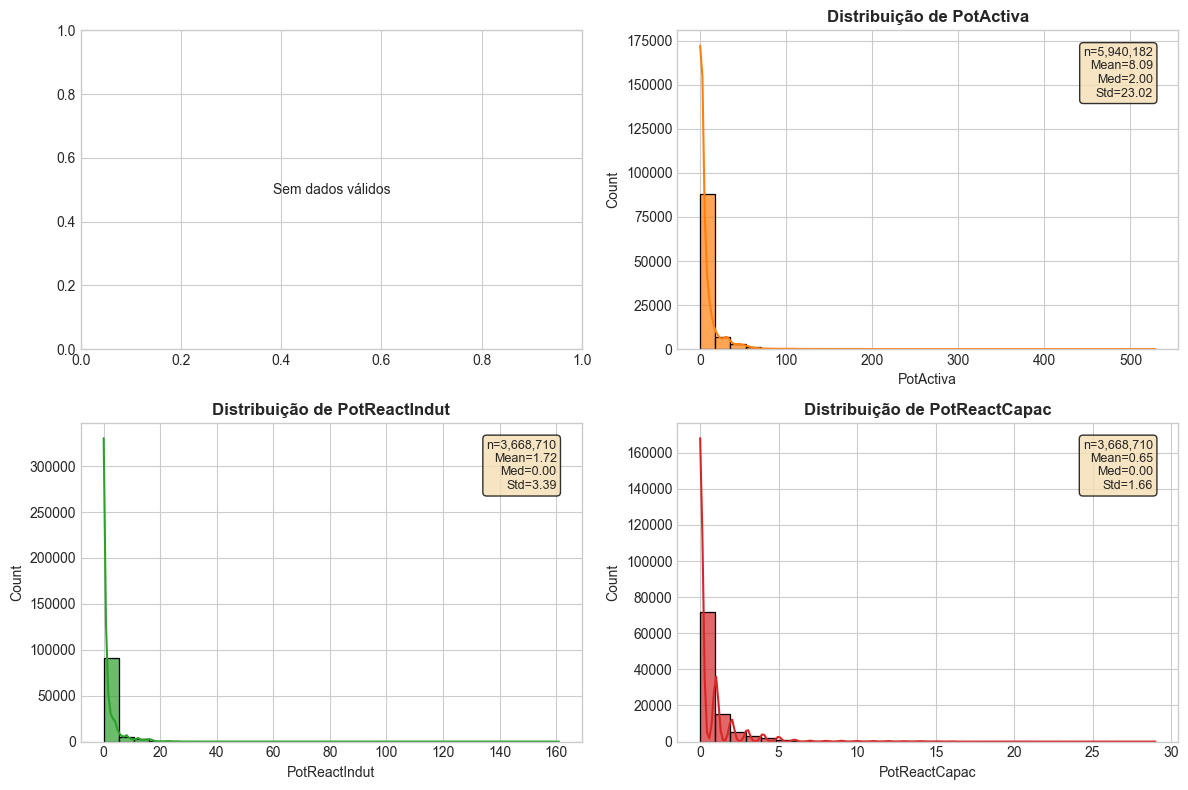

In [16]:
# Histogramas e KDE das variáveis numéricas
n_cols = len(available_cols)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # MELHORAMENTO: Tamanho menor
axes = axes.flatten()

for i, col in enumerate(available_cols):
    ax = axes[i]
    data = df[col].dropna()
    plot_histogram_kde(data, f'Distribuição de {col}', ax, COLORS[i])

for i in range(len(available_cols), 4):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

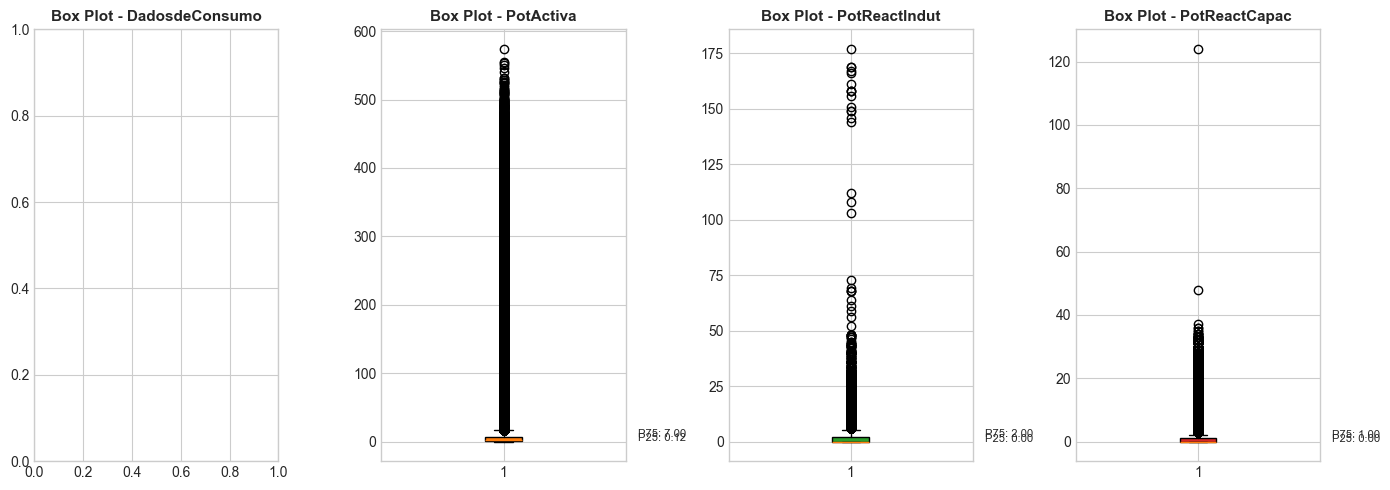

In [17]:
# Box plots das variáveis numéricas
fig, axes = plt.subplots(1, len(available_cols), figsize=(14, 5))

if len(available_cols) == 1:
    axes = [axes]

for i, col in enumerate(available_cols):
    data = df[col].dropna()
    if len(data) > 0:
        bp = axes[i].boxplot(data, patch_artist=True)
        bp['boxes'][0].set_facecolor(COLORS[i])
        # MELHORAMENTO: Adicionar percentis
        p25, p75 = data.quantile([0.25, 0.75])
        axes[i].text(1.05, p25, f'P25: {p25:.2f}', transform=axes[i].get_yaxis_transform(), fontsize=8)
        axes[i].text(1.05, p75, f'P75: {p75:.2f}', transform=axes[i].get_yaxis_transform(), fontsize=8)
    axes[i].set_title(f'Box Plot - {col}', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

In [18]:
# Identificar outliers usando IQR
print("=" * 80)
print("ANÁLISE DE OUTLIERS (usando método IQR)")
print("=" * 80)

for col in available_cols:
    data = df[col].dropna()
    if len(data) > 0:
        Q1 = data.quantile(0.25)
        Q3 = data.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = data[(data < lower_bound) | (data > upper_bound)]
        n_outliers = len(outliers)
        pct_outliers = (n_outliers / len(data) * 100)
        
        print(f"\n{col}:")
        print(f"  Q1 = {Q1:.4f}, Q3 = {Q3:.4f}, IQR = {IQR:.4f}")
        print(f"  Limites: [{lower_bound:.4f}, {upper_bound:.4f}]")
        # MELHORAMENTO: Adicionar percentis P10/P90
        p10, p90 = data.quantile([0.1, 0.9])
        print(f"  P10 = {p10:.4f}, P90 = {p90:.4f}")
        print(f"  Outliers: {n_outliers:,} ({pct_outliers:.2f}%)")

ANÁLISE DE OUTLIERS (usando método IQR)

PotActiva:
  Q1 = 0.1200, Q3 = 7.0000, IQR = 6.8800
  Limites: [-10.2000, 17.3200]
  P10 = 0.0000, P90 = 21.0000
  Outliers: 701,217 (11.80%)

PotReactIndut:
  Q1 = 0.0000, Q3 = 2.0000, IQR = 2.0000
  Limites: [-3.0000, 5.0000]
  P10 = 0.0000, P90 = 5.0000
  Outliers: 327,543 (8.93%)

PotReactCapac:
  Q1 = 0.0000, Q3 = 1.0000, IQR = 1.0000
  Limites: [-1.5000, 2.5000]
  P10 = 0.0000, P90 = 2.0000
  Outliers: 282,285 (7.69%)


### 2.7 Matriz de Correlação

In [19]:
# Calcular matriz de correlação
correlation_matrix = df[available_cols].corr()

print("Matriz de Correlação:")
print(correlation_matrix.round(4))

Matriz de Correlação:
                DadosdeConsumo  PotActiva  PotReactIndut  PotReactCapac
DadosdeConsumo             NaN        NaN            NaN            NaN
PotActiva                  NaN     1.0000         0.2100         0.1347
PotReactIndut              NaN     0.2100         1.0000        -0.1399
PotReactCapac              NaN     0.1347        -0.1399         1.0000


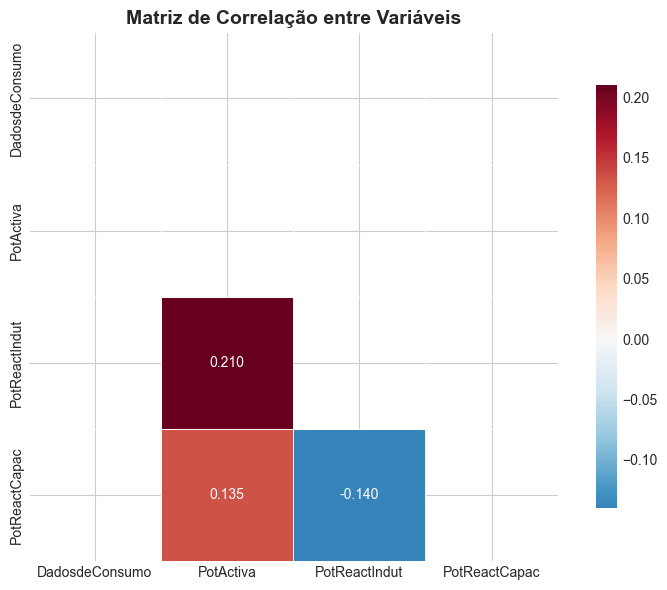

In [20]:
# Visualização da matriz de correlação
fig, ax = plt.subplots(figsize=(8, 6))

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='RdBu_r', center=0,
            square=True, linewidths=0.5, ax=ax, mask=mask,
            cbar_kws={'shrink': 0.8})

ax.set_title('Matriz de Correlação entre Variáveis', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### 2.8 Análise Temporal

In [21]:
# Criar colunas temporais auxiliares
df['hora'] = df['tstamp'].dt.hour
df['dia_semana'] = df['tstamp'].dt.dayofweek  # 0=Segunda, 6=Domingo
df['dia_semana_nome'] = df['tstamp'].dt.day_name()
df['mes'] = df['tstamp'].dt.month
df['ano'] = df['tstamp'].dt.year
df['is_weekend'] = df['dia_semana'].isin([5, 6]).astype(int)

print("Colunas temporais criadas:")
print("  - hora (0-23)")
print("  - dia_semana (0-6, Segunda-Domingo)")
print("  - dia_semana_nome")
print("  - mes")
print("  - ano")
print("  - is_weekend (0=dia útil, 1=fim de semana)")

Colunas temporais criadas:
  - hora (0-23)
  - dia_semana (0-6, Segunda-Domingo)
  - dia_semana_nome
  - mes
  - ano
  - is_weekend (0=dia útil, 1=fim de semana)


Variável utilizada para análise: PotActiva


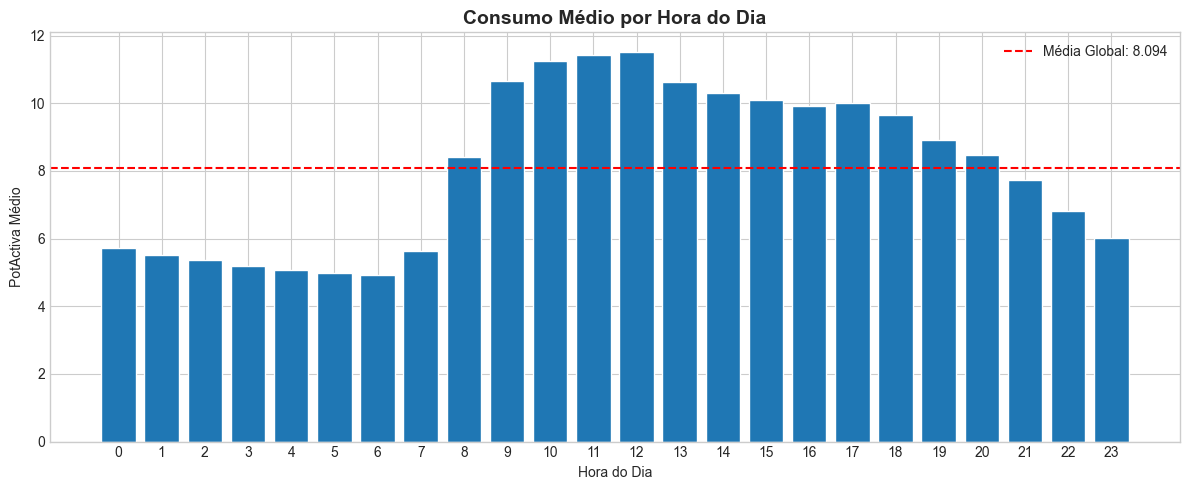

In [22]:
# Consumo médio por hora do dia
# Usar PotActiva se DadosdeConsumo tiver muitos valores nulos
target_col = 'PotActiva' if df['DadosdeConsumo'].isna().sum() > df['PotActiva'].isna().sum() else 'DadosdeConsumo'
print(f"Variável utilizada para análise: {target_col}")

consumo_hora = df.groupby('hora')[target_col].mean()

fig, ax = plt.subplots(figsize=(12, 5))
ax.bar(consumo_hora.index, consumo_hora.values, color=COLORS[0], edgecolor='white')
ax.set_xlabel('Hora do Dia')
ax.set_ylabel(f'{target_col} Médio')
ax.set_title(f'Consumo Médio por Hora do Dia', fontsize=14, fontweight='bold')
ax.set_xticks(range(24))
ax.axhline(consumo_hora.mean(), color='red', linestyle='--', label=f'Média Global: {consumo_hora.mean():.3f}')
ax.legend()
plt.tight_layout()
plt.show()

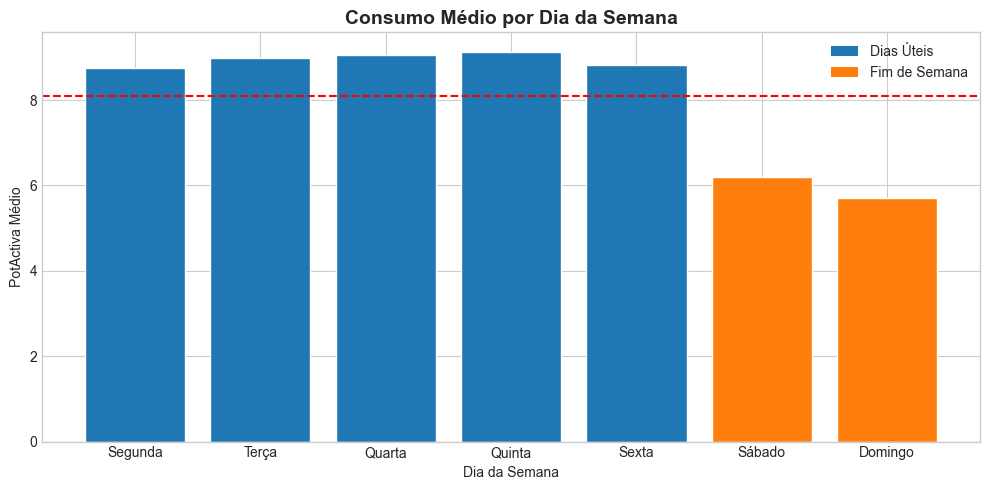

In [23]:
# Consumo médio por dia da semana
dias_ordem = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dias_pt = ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo']

consumo_dia = df.groupby('dia_semana_nome')[target_col].mean().reindex(dias_ordem)

fig, ax = plt.subplots(figsize=(10, 5))
colors_dias = [COLORS[1] if dia in ['Saturday', 'Sunday'] else COLORS[0] for dia in dias_ordem]
ax.bar(dias_pt, consumo_dia.values, color=colors_dias, edgecolor='white')
ax.set_xlabel('Dia da Semana')
ax.set_ylabel(f'{target_col} Médio')
ax.set_title(f'Consumo Médio por Dia da Semana', fontsize=14, fontweight='bold')
ax.axhline(consumo_dia.mean(), color='red', linestyle='--', label=f'Média: {consumo_dia.mean():.3f}')

# Legenda
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=COLORS[0], label='Dias Úteis'),
                   Patch(facecolor=COLORS[1], label='Fim de Semana')]
ax.legend(handles=legend_elements, loc='upper right')

plt.tight_layout()
plt.show()

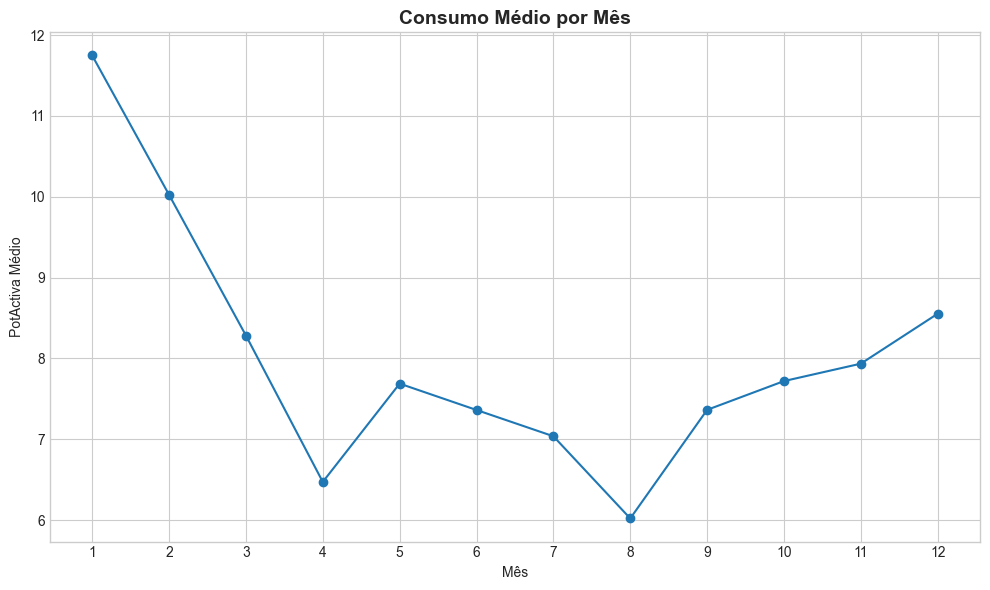

In [24]:
# MELHORAMENTO: Consumo médio por mês
consumo_mes = df.groupby('mes')[target_col].mean()

fig, ax = plt.subplots(figsize=FIG_SIZE_DEFAULT)
ax.plot(consumo_mes.index, consumo_mes.values, marker='o', color=COLORS[0])
ax.set_title('Consumo Médio por Mês', fontsize=14, fontweight='bold')
ax.set_xlabel('Mês')
ax.set_ylabel(f'{target_col} Médio')
ax.set_xticks(range(1, 13))
plt.tight_layout()
plt.show()

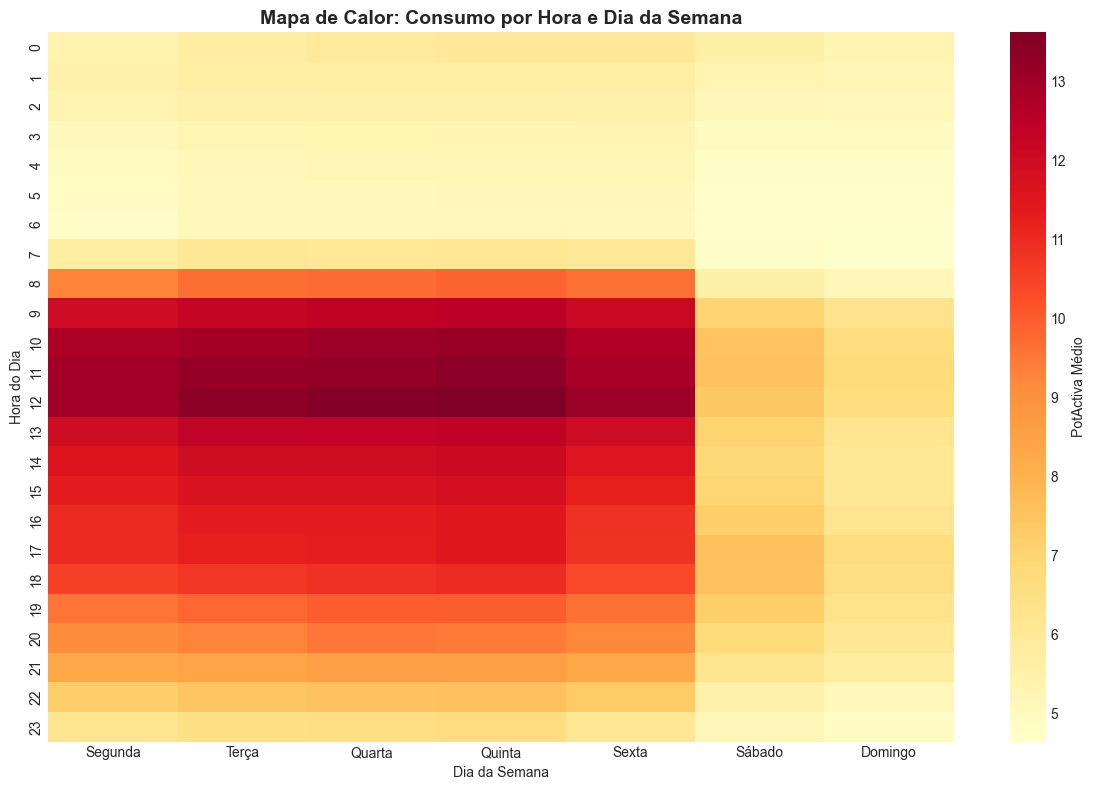

In [25]:
# Heatmap: consumo médio por hora e dia da semana
consumo_hora_dia = df.pivot_table(
    values=target_col, 
    index='hora', 
    columns='dia_semana',
    aggfunc='mean'
)
consumo_hora_dia.columns = dias_pt

fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(consumo_hora_dia, cmap='YlOrRd', annot=False, ax=ax, 
            cbar_kws={'label': f'{target_col} Médio'})
ax.set_xlabel('Dia da Semana')
ax.set_ylabel('Hora do Dia')
ax.set_title('Mapa de Calor: Consumo por Hora e Dia da Semana', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


Análise de Autocorrelação:


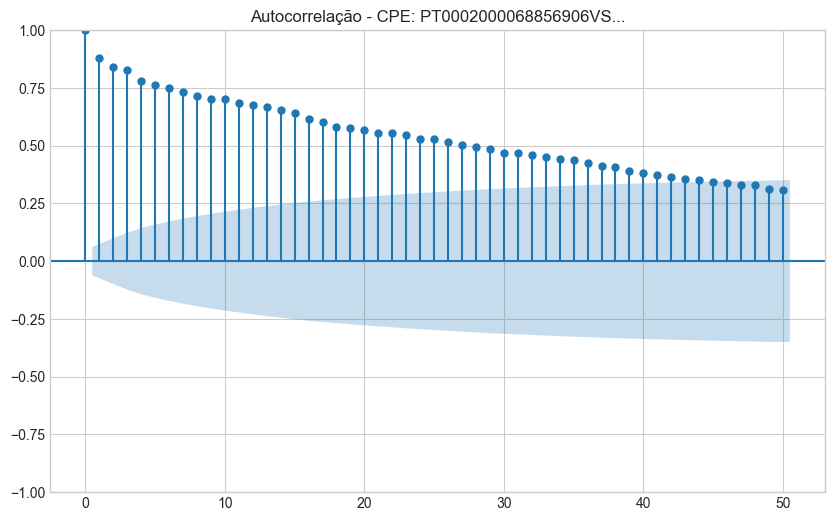

In [26]:
# MELHORAMENTO: Análise de autocorrelação para um CPE exemplo
print("\nAnálise de Autocorrelação:")

# Selecionar um CPE exemplo (o com mais registos)
cpe_exemplo = cpe_counts['CPE'].iloc[0]
df_cpe = df[df['CPE'] == cpe_exemplo]

# Tentar plotar autocorrelação
try:
    from statsmodels.graphics.tsaplots import plot_acf
    fig, ax = plt.subplots(figsize=FIG_SIZE_DEFAULT)
    n_points = min(POINTS_AUTOCORR, len(df_cpe[target_col].dropna()))
    plot_acf(df_cpe[target_col].dropna().head(n_points), lags=min(50, n_points//20), ax=ax)
    ax.set_title(f'Autocorrelação - CPE: {cpe_exemplo[:20]}...')
    plt.show()
except ImportError:
    print("statsmodels não instalado. Instale com: pip install statsmodels")
except Exception as e:
    print(f"Erro na análise de autocorrelação: {e}")

### 2.9 Séries Temporais de Exemplo

In [27]:
# Selecionar CPEs para visualização de séries temporais
# Vamos escolher alguns CPEs com diferentes quantidades de registos
cpe_list = cpe_counts['CPE'].tolist()

# Selecionar até 5 CPEs para análise
n_sample = min(5, len(cpe_list))
sample_cpes = cpe_list[:n_sample]  # Os CPEs com mais registos

print(f"CPEs selecionados para análise de séries temporais ({n_sample}):")
for i, cpe in enumerate(sample_cpes, 1):
    n_reg = cpe_counts[cpe_counts['CPE'] == cpe]['n_registos'].values[0]
    print(f"  {i}. {cpe} ({n_reg:,} registos)")

CPEs selecionados para análise de séries temporais (5):
  1. PT0002000068856906VS (81,776 registos)
  2. PT0002000068856781NM (81,776 registos)
  3. PT0002000081997398TD (81,774 registos)
  4. PT0002000073231742VK (81,773 registos)
  5. PT0002000078233981HJ (81,772 registos)


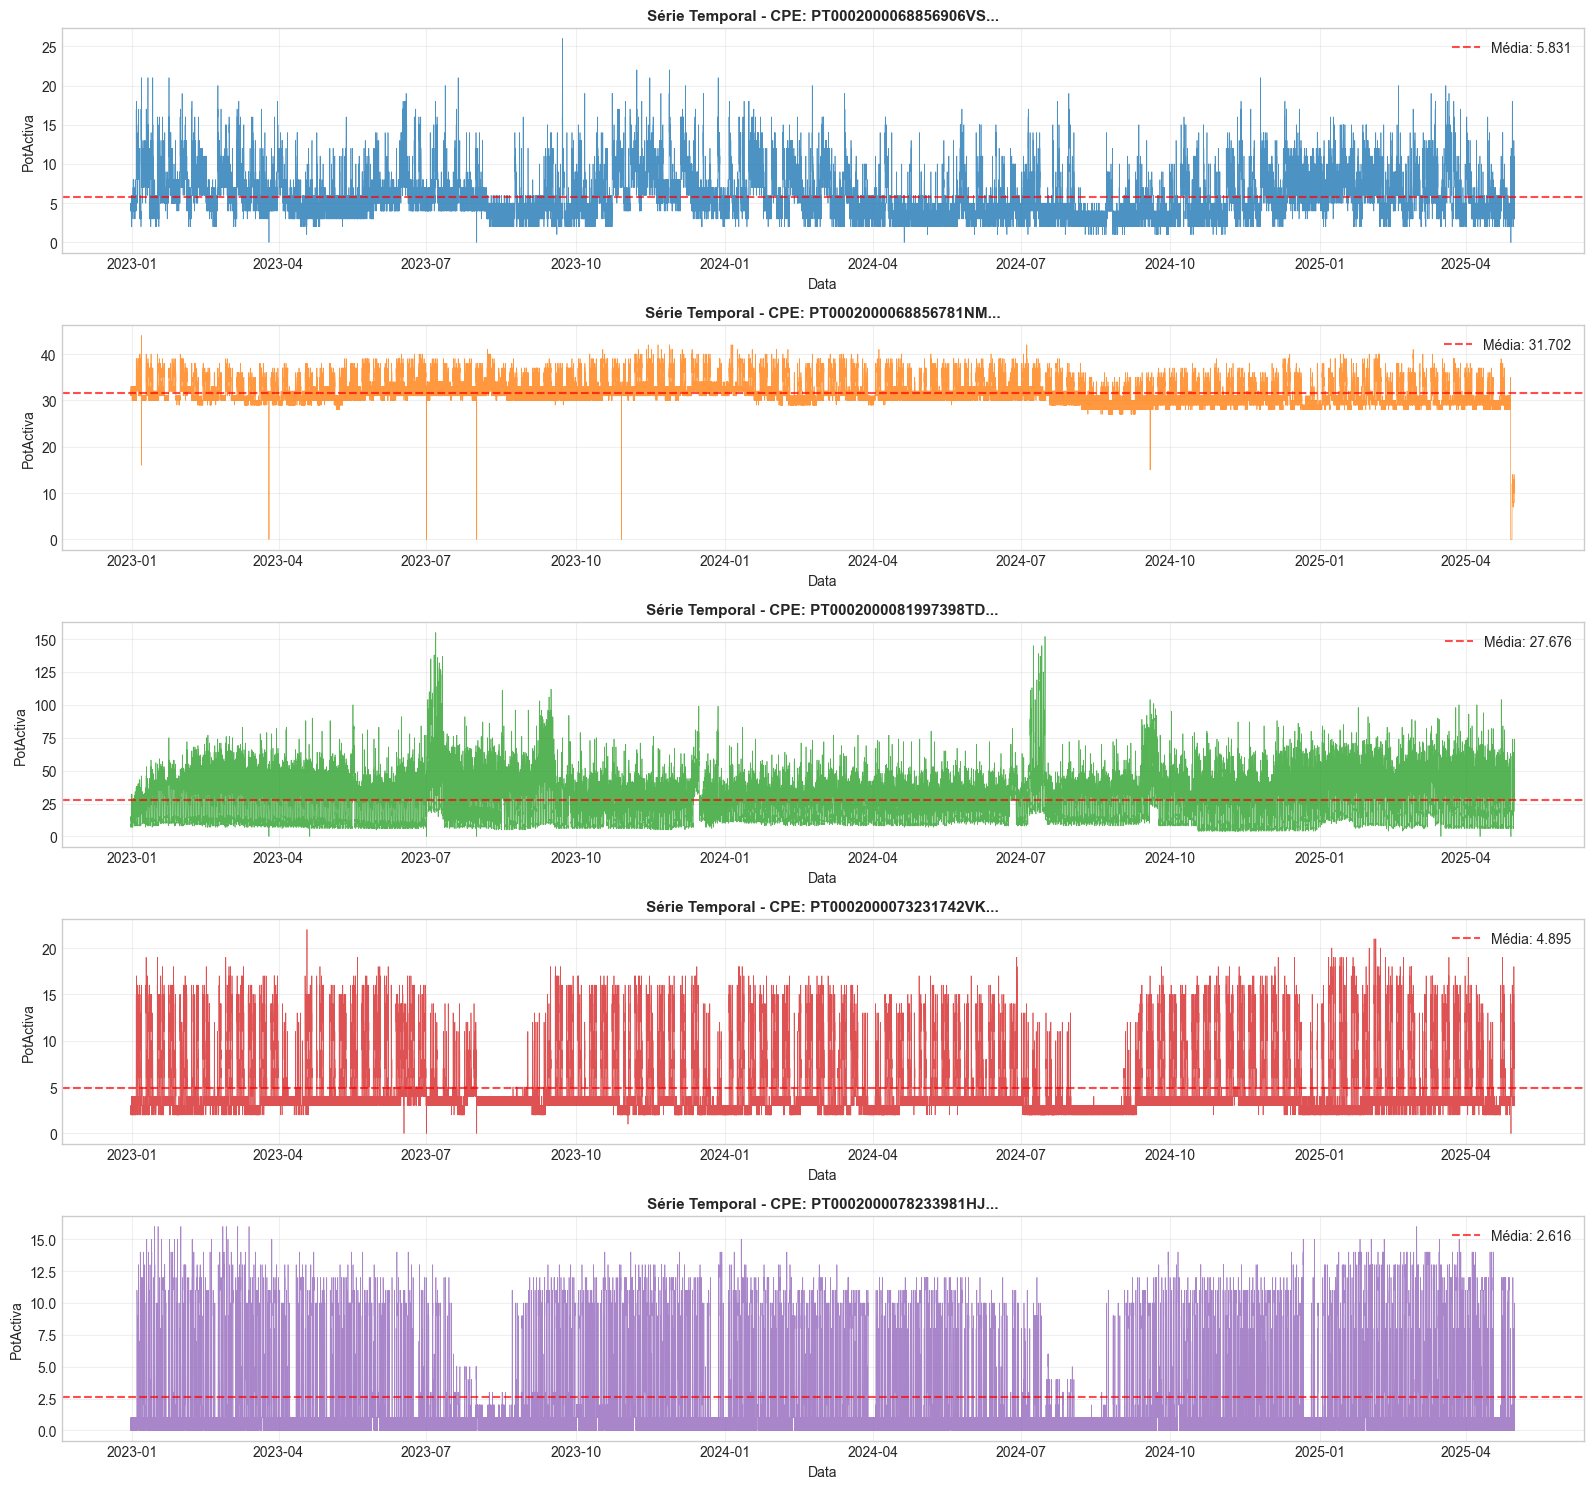

In [28]:
# Visualizar séries temporais completas de alguns CPEs
fig, axes = plt.subplots(n_sample, 1, figsize=(16, 3*n_sample))

if n_sample == 1:
    axes = [axes]

for i, cpe in enumerate(sample_cpes):
    df_cpe = df[df['CPE'] == cpe].copy()
    # MELHORAMENTO: Usar sampling para plotar apenas 10% dos pontos
    df_cpe_sample = df_cpe.sample(frac=0.1, random_state=42) if len(df_cpe) > SAMPLE_SIZE else df_cpe
    
    ax = axes[i]
    ax.plot(df_cpe_sample['tstamp'], df_cpe_sample[target_col], color=COLORS[i % len(COLORS)], linewidth=0.5, alpha=0.8)
    ax.set_xlabel('Data')
    ax.set_ylabel(target_col)
    ax.set_title(f'Série Temporal - CPE: {cpe[:30]}...', fontsize=11, fontweight='bold')
    ax.grid(True, alpha=0.3)
    
    # Adicionar estatísticas
    mean_val = df_cpe[target_col].mean()
    ax.axhline(mean_val, color='red', linestyle='--', alpha=0.7, label=f'Média: {mean_val:.3f}')
    ax.legend(loc='upper right')

plt.tight_layout()
plt.show()

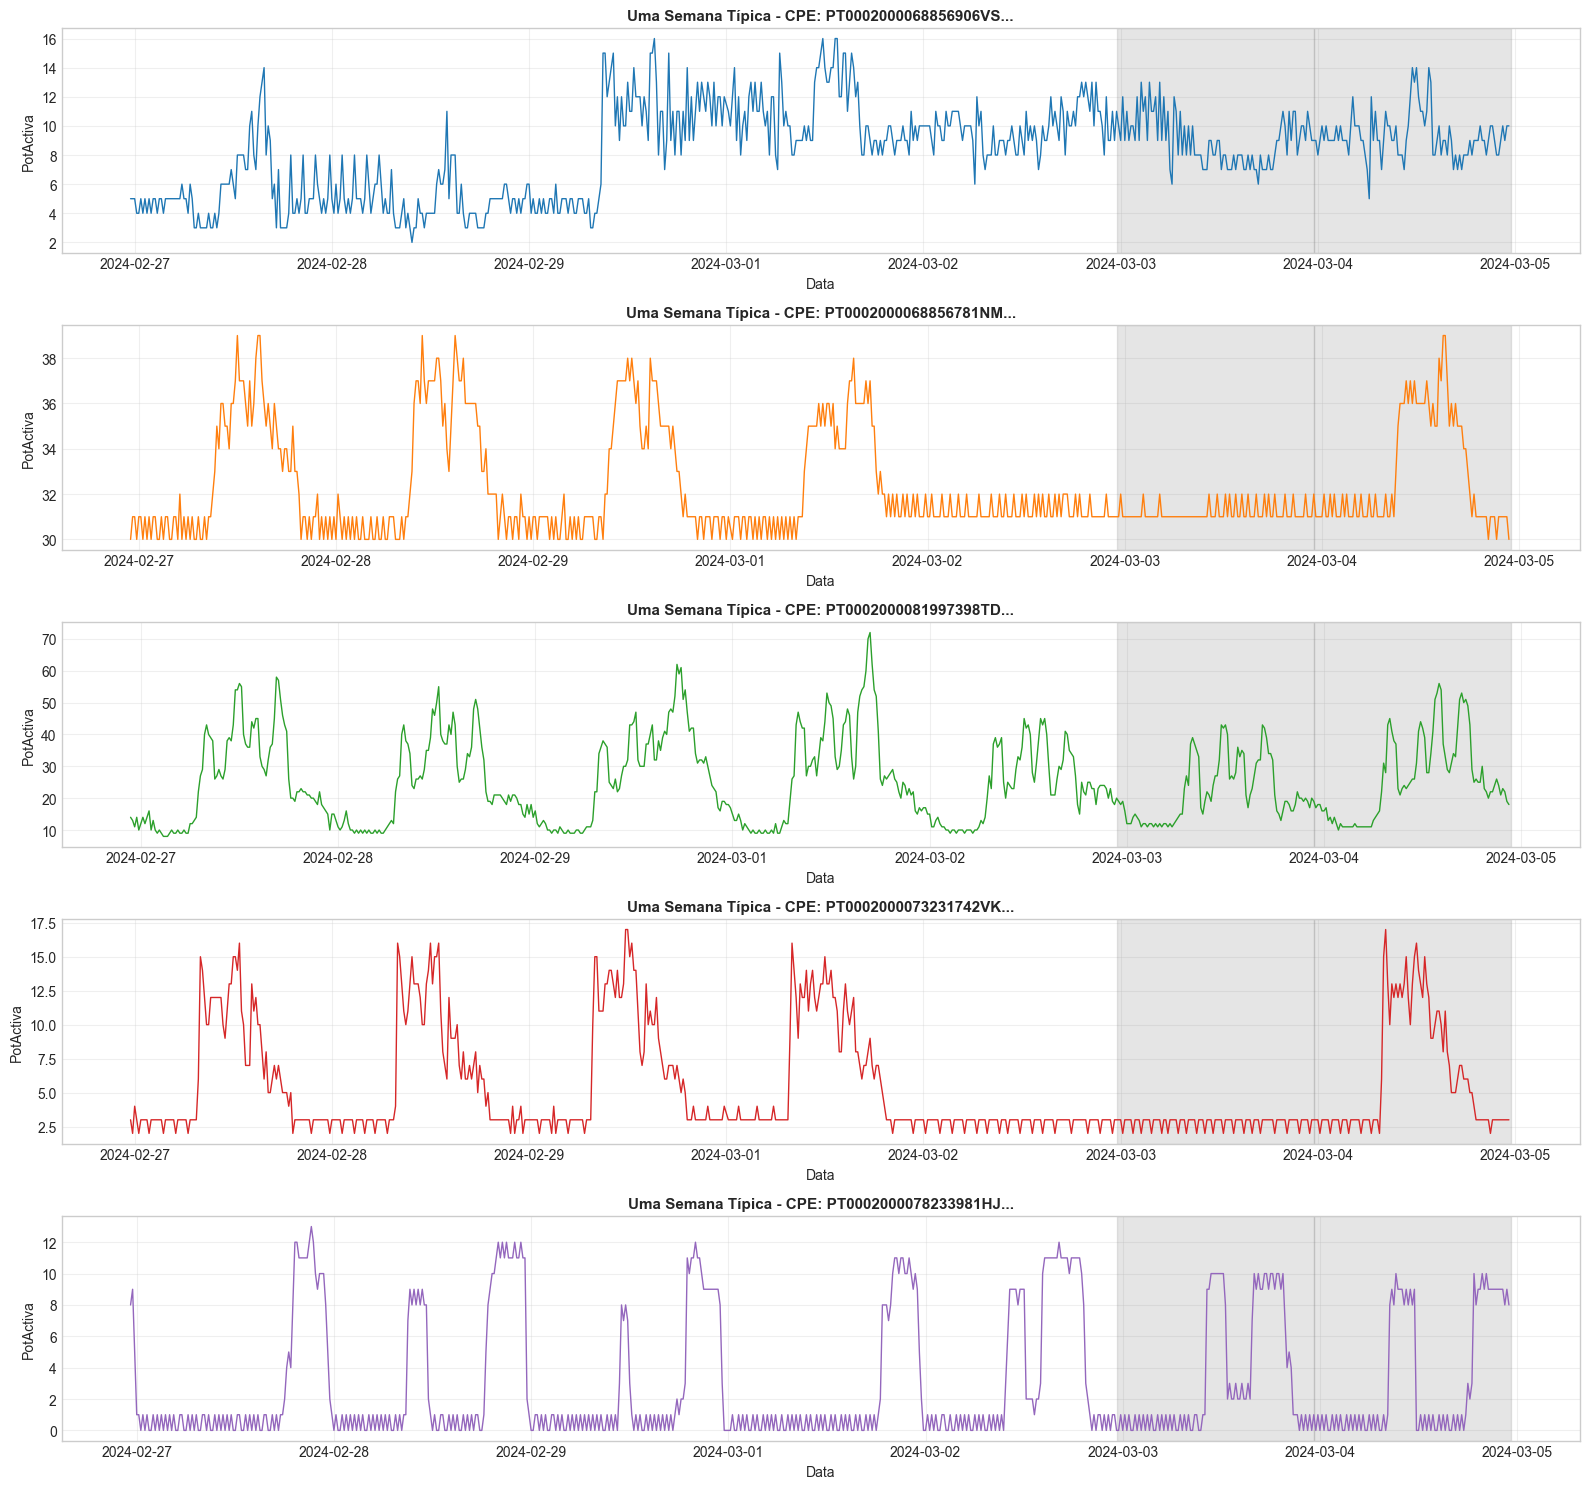

In [29]:
# Visualizar uma semana típica de cada CPE
fig, axes = plt.subplots(n_sample, 1, figsize=(16, 3*n_sample))

if n_sample == 1:
    axes = [axes]

for i, cpe in enumerate(sample_cpes):
    df_cpe = df[df['CPE'] == cpe].copy()
    
    # Selecionar uma semana no meio dos dados
    mid_date = df_cpe['tstamp'].iloc[len(df_cpe)//2]
    start_week = mid_date - timedelta(days=3)
    end_week = start_week + timedelta(days=7)
    
    df_week = df_cpe[(df_cpe['tstamp'] >= start_week) & (df_cpe['tstamp'] < end_week)]
    
    ax = axes[i]
    ax.plot(df_week['tstamp'], df_week[target_col], color=COLORS[i % len(COLORS)], linewidth=1)
    ax.set_xlabel('Data')
    ax.set_ylabel(target_col)
    ax.set_title(f'Uma Semana Típica - CPE: {cpe[:30]}...', fontsize=11, fontweight='bold')
    ax.grid(True, alpha=0.3)
    
    # Marcar fins de semana
    for date in pd.date_range(start_week, end_week, freq='D'):
        if date.dayofweek >= 5:  # Sábado ou Domingo
            ax.axvspan(date, date + timedelta(days=1), alpha=0.2, color='gray')

plt.tight_layout()
plt.show()

### 2.10 Comparação de Perfis de Consumo entre CPEs

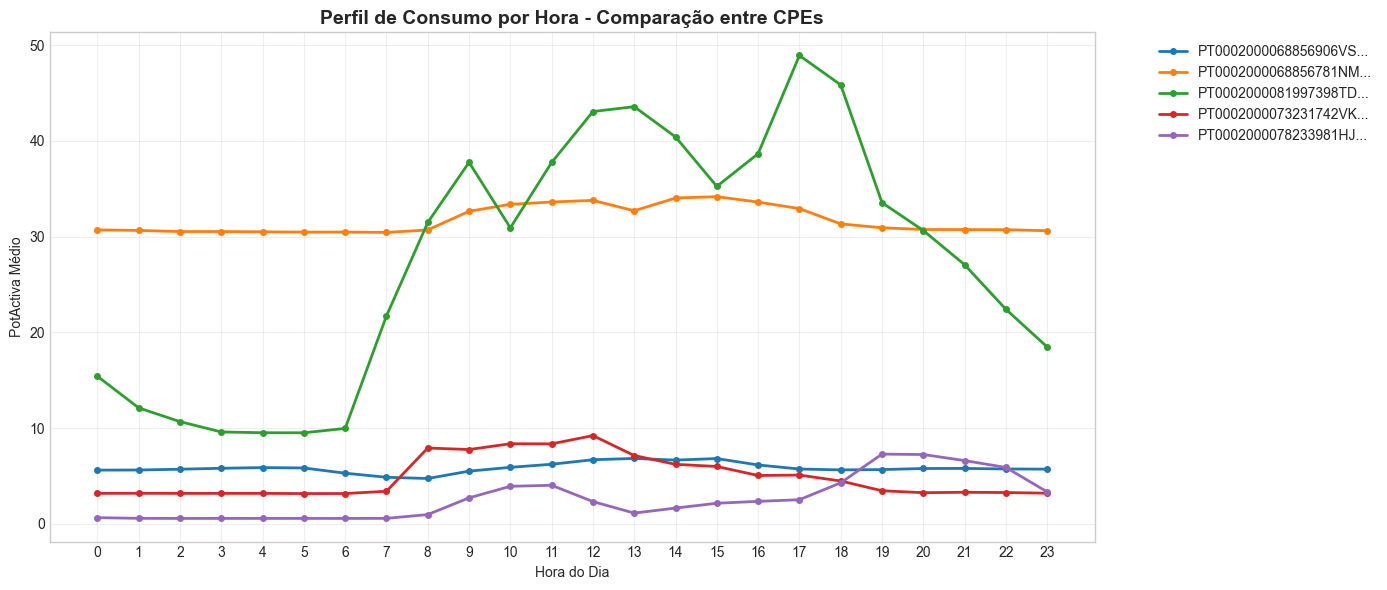

In [30]:
# Perfil médio por hora do dia para cada CPE
fig, ax = plt.subplots(figsize=(14, 6))

for i, cpe in enumerate(sample_cpes):
    df_cpe = df[df['CPE'] == cpe]
    perfil_hora = df_cpe.groupby('hora')[target_col].mean()
    ax.plot(perfil_hora.index, perfil_hora.values, marker='o', markersize=4,
            label=f'{cpe[:20]}...', color=COLORS[i % len(COLORS)], linewidth=2)

ax.set_xlabel('Hora do Dia')
ax.set_ylabel(f'{target_col} Médio')
ax.set_title('Perfil de Consumo por Hora - Comparação entre CPEs', fontsize=14, fontweight='bold')
ax.set_xticks(range(24))
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [31]:
# Estatísticas agregadas por CPE
stats_por_cpe = df.groupby('CPE').agg({
    target_col: ['mean', 'std', 'min', 'max', 'median', 'count'],
    'tstamp': ['min', 'max']
}).round(4)

stats_por_cpe.columns = ['_'.join(col).strip() for col in stats_por_cpe.columns.values]
stats_por_cpe = stats_por_cpe.reset_index()

# Calcular coeficiente de variação
stats_por_cpe['cv'] = (stats_por_cpe[f'{target_col}_std'] / stats_por_cpe[f'{target_col}_mean'] * 100).round(2)

print("Estatísticas de Consumo por CPE:")
print("=" * 120)
stats_por_cpe

Estatísticas de Consumo por CPE:


,CPE,PotActiva_mean,PotActiva_std,PotActiva_min,PotActiva_max,PotActiva_median,PotActiva_count,tstamp_min,tstamp_max,cv
0,PT0002000032936306KX,2.4370,2.7791,0.0000,30.7560,0.0000,38008,2024-03-01 00:15:00,2025-05-01,114.0400
1,PT0002000032942455NH,0.0909,0.1312,0.0000,2.8600,0.0600,32058,2024-06-01 00:15:00,2025-05-01,144.3300
2,PT0002000032959511HP,0.0000,0.0000,0.0000,0.0000,0.0000,43666,2024-02-01 00:15:00,2025-05-01,NaN
3,PT0002000032966446CC,0.0998,0.1051,0.0000,2.2440,0.0840,35081,2024-05-01 00:15:00,2025-05-01,105.3100
4,PT0002000032968749YT,3.6398,4.0012,0.0000,31.4960,2.0360,43668,2024-02-01 00:00:00,2025-05-01,109.9300
...,...,...,...,...,...,...,...,...,...,...
86,PT0002000125379984SH,4.7524,4.8244,0.0000,63.0000,2.0000,69969,2022-12-31 00:15:00,2025-05-01,101.5200
87,PT0002000131605602FL,1.3287,1.5888,0.0000,4.6840,0.0000,29517,2024-03-01 00:15:00,2025-02-01,119.5800
88,PT0002000133505542CK,0.1133,0.0138,0.0000,0.2360,0.1160,81675,2023-01-01 00:15:00,2025-05-01,12.1800
89,PT0002000133685986TF,0.0798,0.0989,0.0000,8.0000,0.0000,67187,2023-05-01 00:15:00,2025-05-01,123.9300


### 2.11 Conclusões da Fase de Data Understanding

In [32]:
# Resumo das principais descobertas
print("="*80)
print("RESUMO - DATA UNDERSTANDING")
print("="*80)

# MELHORAMENTO: Usar tabulate para resumo mais legível
resumo_df = pd.DataFrame({
    'Métrica': ['Total Registos', 'Número CPEs', 'Período (dias)', 'Variável Principal'],
    'Valor': [f"{len(df):,}", n_cpes, f"{(df['tstamp'].max() - df['tstamp'].min()).days}", target_col]
})
print(tabulate(resumo_df, headers='keys', tablefmt='grid'))

print(f"\n📉 VALORES EM FALTA:")
for col in available_cols:
    missing = df[col].isna().sum()
    pct = missing / len(df) * 100
    print(f"   • {col}: {missing:,} ({pct:.2f}%)")

print(f"\n🔍 VARIÁVEL PRINCIPAL ({target_col}):")
data_valid = df[target_col].dropna()
print(f"   • Média: {data_valid.mean():.4f}")
print(f"   • Mediana: {data_valid.median():.4f}")
print(f"   • Desvio Padrão: {data_valid.std():.4f}")
print(f"   • Mínimo: {data_valid.min():.4f}")
print(f"   • Máximo: {data_valid.max():.4f}")

print(f"\n⏰ PADRÕES TEMPORAIS OBSERVADOS:")
print(f"   • Leituras a cada 15 minutos (96 pontos/dia, 672 pontos/semana)")
print(f"   • Diferenças visíveis entre dias úteis e fins de semana")
print(f"   • Padrões diários distintos entre CPEs")

print(f"\n💡 PRÓXIMOS PASSOS (Data Preparation):")
print(f"   1. Tratar valores em falta (imputação ou exclusão)")
print(f"   2. Filtrar CPEs com dados insuficientes")
print(f"   3. Criar features agregadas para clustering")
print(f"   4. Preparar séries temporais para modelação")

RESUMO - DATA UNDERSTANDING
+----+--------------------+-----------+
|    | Métrica            | Valor     |
+====+====================+===========+
|  0 | Total Registos     | 5,940,182 |
+----+--------------------+-----------+
|  1 | Número CPEs        | 91        |
+----+--------------------+-----------+
|  2 | Período (dias)     | 851       |
+----+--------------------+-----------+
|  3 | Variável Principal | PotActiva |
+----+--------------------+-----------+

📉 VALORES EM FALTA:
   • DadosdeConsumo: 5,940,182 (100.00%)
   • PotActiva: 0 (0.00%)
   • PotReactIndut: 2,271,472 (38.24%)
   • PotReactCapac: 2,271,472 (38.24%)

🔍 VARIÁVEL PRINCIPAL (PotActiva):
   • Média: 8.0940
   • Mediana: 2.0000
   • Desvio Padrão: 23.0183
   • Mínimo: 0.0000
   • Máximo: 574.0000

⏰ PADRÕES TEMPORAIS OBSERVADOS:
   • Leituras a cada 15 minutos (96 pontos/dia, 672 pontos/semana)
   • Diferenças visíveis entre dias úteis e fins de semana
   • Padrões diários distintos entre CPEs

💡 PRÓXIMOS PASSOS (

### 2.12 Próximos Passos

Com base nos insights obtidos nesta fase de Data Understanding, o projeto avança para:

1. **02_data_preparation_feature_engineering.ipynb**: 
   - Tratamento de valores em falta e outliers
   - Criação de features agregadas para clustering e previsão
   - Preparação de datasets para modelação

2. **03_clustering_analysis.ipynb**:
   - Aplicação de algoritmos de clustering (K-Means, DBSCAN)
   - Identificação e caracterização de perfis de consumo

3. **04_time_series_forecasting.ipynb**:
   - Desenvolvimento de modelos ARIMA e LSTM
   - Comparação com baseline e avaliação de performance

4. **05_feature_based_prediction.ipynb**:
   - Modelos com features agregadas (Random Forest, XGBoost, MLP)
   - Análise do impacto da normalização

Este notebook estabelece a base para um projeto de ML bem-sucedido, com dados bem compreendidos e objetivos claros.

### 2.13 Guardar Dados Limpos (Opcional)

In [33]:
# Guardar uma versão do dataset com as colunas temporais adicionadas
# (Opcional - descomente se pretender guardar)

# import os
# output_dir = 'data/intermediate'
# os.makedirs(output_dir, exist_ok=True)

# df.to_parquet(f'{output_dir}/d4maia_with_temporal.parquet', index=False)
# print(f"Dados guardados em: {output_dir}/d4maia_with_temporal.parquet")

print("Notebook de Business & Data Understanding concluído!")
print("\nPróximo passo: 02_data_preparation_feature_engineering.ipynb")

Notebook de Business & Data Understanding concluído!

Próximo passo: 02_data_preparation_feature_engineering.ipynb
